In [1]:
import json
import matplotlib.pyplot as plt
from PIL import Image

In [29]:
image_path = "../../tests/010170_0105_0072_06.png"  # original seismogram image
geojson_path = "./010170_0105_0072_06/meanlines.json"  # path to your geojson

In [31]:
img = Image.open(image_path)

In [33]:
with open(geojson_path) as f:
    data = json.load(f)


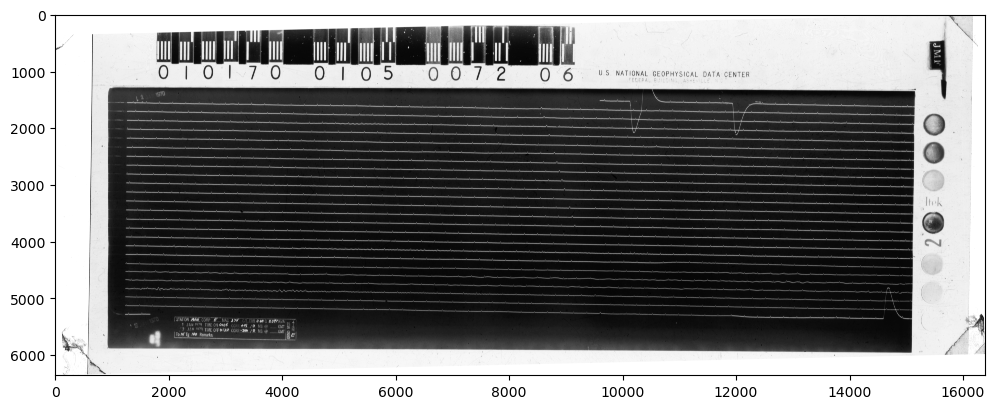

In [35]:
plt.figure(figsize=(12, 6))
plt.imshow(img, cmap='gray')
ax = plt.gca()

In [36]:
# Overlay lines from geojson
for feature in data['features']:
    coords = feature['geometry']['coordinates']
    if feature['geometry']['type'] == 'LineString':
        xs, ys = zip(*coords)
        ax.plot(xs, ys, linewidth=1, color='red')
    elif feature['geometry']['type'] == 'Point':
        ax.plot(coords[0], coords[1], 'bo')

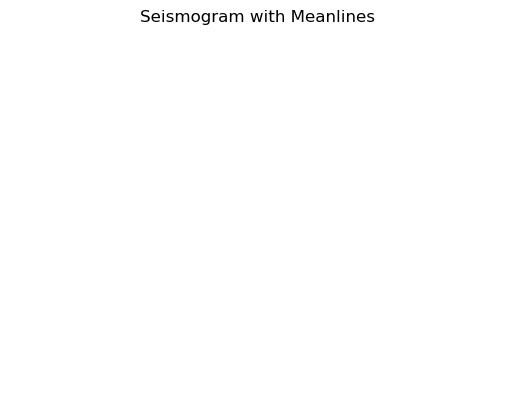

In [41]:
plt.title("Seismogram with Meanlines")
plt.axis('off')
plt.show()

In [43]:
data

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'id': 0,
   'geometry': {'type': 'LineString',
    'coordinates': [[0, 3261], [16391, 3547]]},
   'properties': {}},
  {'type': 'Feature',
   'id': 1,
   'geometry': {'type': 'LineString',
    'coordinates': [[0, 2154], [16391, 2440]]},
   'properties': {}},
  {'type': 'Feature',
   'id': 2,
   'geometry': {'type': 'LineString',
    'coordinates': [[0, 3420], [16391, 3706]]},
   'properties': {}},
  {'type': 'Feature',
   'id': 3,
   'geometry': {'type': 'LineString',
    'coordinates': [[0, 3102], [16391, 3388]]},
   'properties': {}},
  {'type': 'Feature',
   'id': 4,
   'geometry': {'type': 'LineString',
    'coordinates': [[0, 3579], [16391, 3865]]},
   'properties': {}},
  {'type': 'Feature',
   'id': 5,
   'geometry': {'type': 'LineString',
    'coordinates': [[0, 1993], [16391, 2279]]},
   'properties': {}},
  {'type': 'Feature',
   'id': 6,
   'geometry': {'type': 'LineString',
    'coordinates': [[0, 2627], [16

Saved overlay to: ./overlap


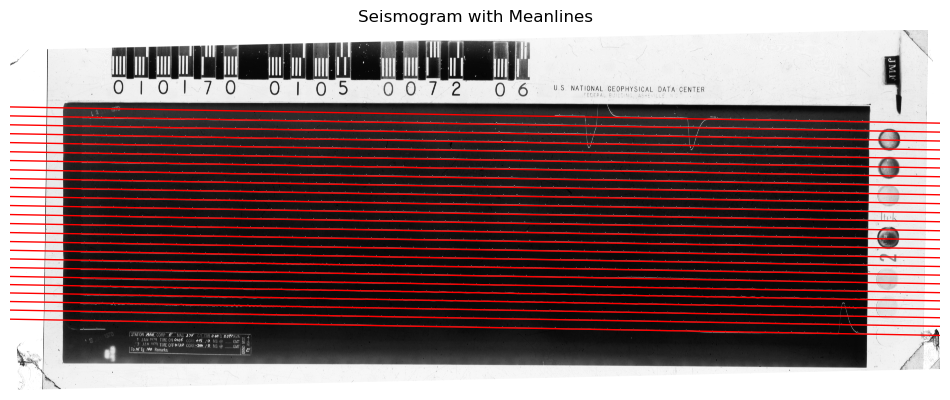

In [61]:
image_path = "../../tests/010170_0105_0072_06.png" 
geojson_path = "./010170_0105_0072_06/meanlines.json"  
output_path = "./overlap"

# === Load image ===
img = Image.open(image_path)

with open(geojson_path, 'r') as f:
    geojson_data = json.load(f)

# === Plot image and overlay lines ===
plt.figure(figsize=(12, 6))
plt.imshow(img, cmap='gray')
ax = plt.gca()

for feature in geojson_data['features']:
    coords = feature['geometry']['coordinates']
    xs, ys = zip(*coords)
    ax.plot(xs, ys, color='red', linewidth=1)

plt.axis('off')
plt.title('Seismogram with Meanlines')

# === Save overlay image ===
plt.savefig(output_path, bbox_inches='tight', pad_inches=0)
print(f"Saved overlay to: {output_path}")

plt.show()

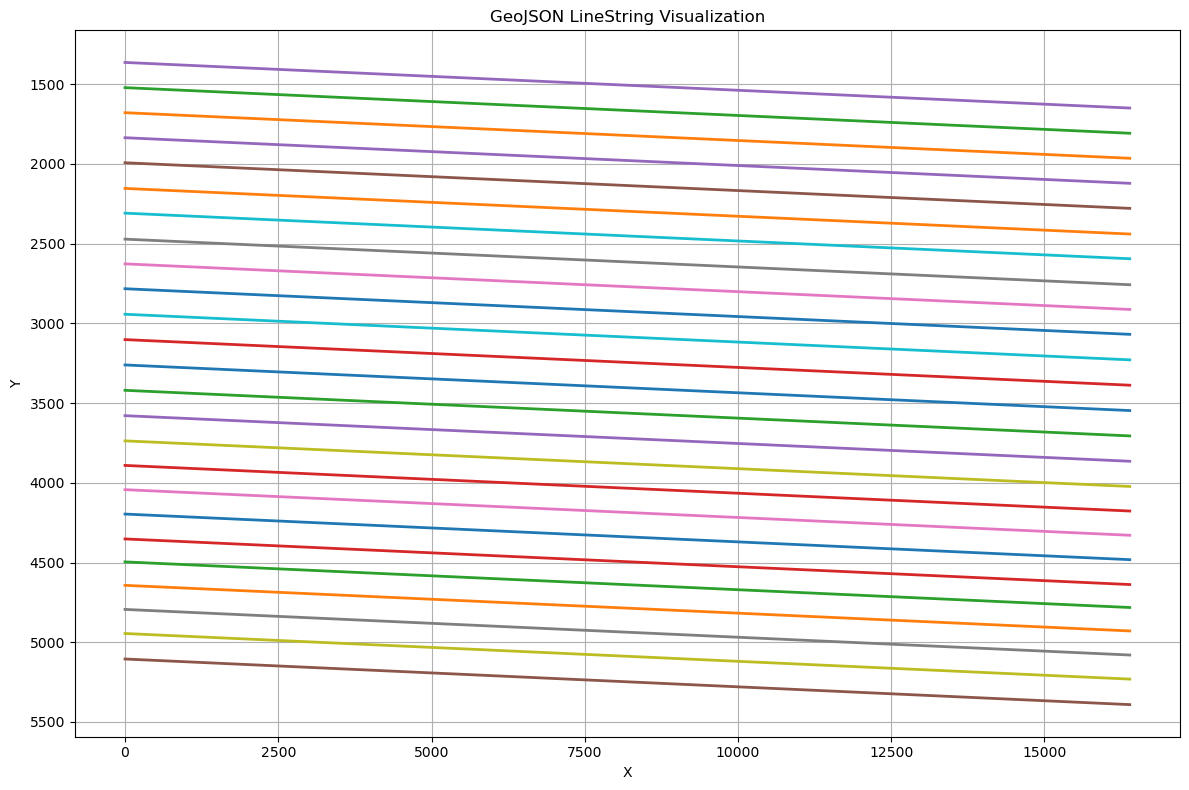

In [57]:
import json
import matplotlib.pyplot as plt

# Load JSON data from a file
with open("./010170_0105_0072_06/meanlines.json", 'r') as f:
    geojson_data = json.load(f)

# Create a plot
plt.figure(figsize=(12, 8))

# Loop through each feature and plot the LineString
for feature in geojson_data["features"]:
    coords = feature["geometry"]["coordinates"]
    x_vals = [pt[0] for pt in coords]
    y_vals = [pt[1] for pt in coords]
    plt.plot(x_vals, y_vals, linewidth=2)

# Customize plot
plt.title("GeoJSON LineString Visualization")
plt.xlabel("X")
plt.ylabel("Y")
plt.gca().invert_yaxis()  # Important if working in image space
plt.grid(True)
plt.tight_layout()
plt.show()

Saved overlay to: ./overlap/output.png


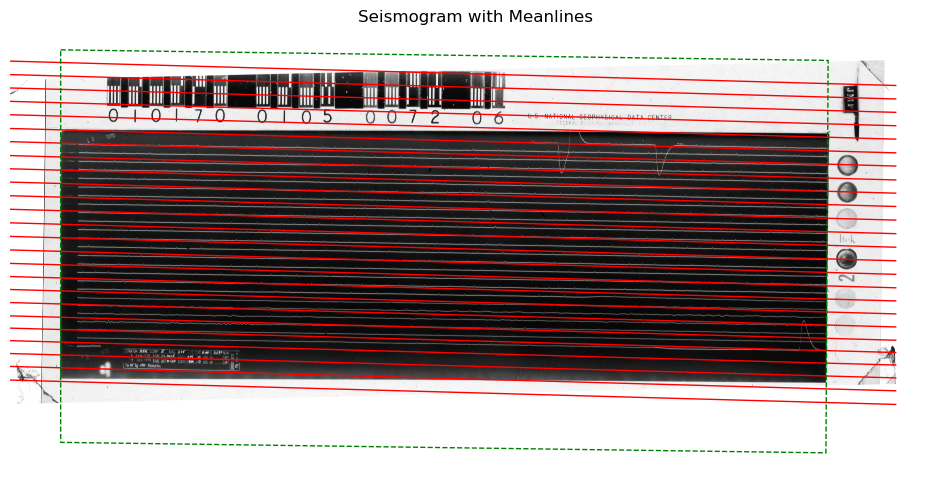

In [75]:
image_path = "../../tests/010170_0105_0072_06.png" 
meanline_path = "./010170_0105_0072_06/meanlines.json"
roi_path = "./010170_0105_0072_06/roi.json"
output_path = "./overlap/output.png"

import json
import matplotlib.pyplot as plt
from PIL import Image

img = Image.open(image_path)
img_width, img_height = img.size

# === Load JSONs ===
with open(meanline_path, 'r') as f:
    meanlines = json.load(f)
with open(roi_path, 'r') as f:
    roi_data = json.load(f)

# === Extract ROI bounds ===
roi_coords = roi_data['geometry']['coordinates'][0]
xs_roi = [pt[0] for pt in roi_coords]
ys_roi = [pt[1] for pt in roi_coords]
min_x, max_x = min(xs_roi), max(xs_roi)
min_y, max_y = min(ys_roi), max(ys_roi)

# === Get the full range of the meanlines ===
all_x_values = []
all_y_values = []
for feature in meanlines['features']:
    coords = feature['geometry']['coordinates']
    xs, ys = zip(*coords)
    all_x_values.extend(xs)
    all_y_values.extend(ys)

meanline_min_x, meanline_max_x = min(all_x_values), max(all_x_values)
meanline_min_y, meanline_max_y = min(all_y_values), max(all_y_values)

# === Plot image ===
plt.figure(figsize=(12, 6))
plt.imshow(img, cmap='gray')
ax = plt.gca()

# === Overlay meanlines ===
for feature in meanlines['features']:
    coords = feature['geometry']['coordinates']
    xs_raw, ys_raw = zip(*coords)
    
    # Direct mapping based on the full coordinate space of meanlines
    # This assumes the meanlines and image cover the same area
    xs = [(x / meanline_max_x) * img_width for x in xs_raw]
    ys = [(y - meanline_min_y) / (meanline_max_y - meanline_min_y) * img_height for y in ys_raw]
    
    ax.plot(xs, ys, color='red', linewidth=1)

# Optional: Plot the ROI boundary for debugging
roi_xs = [x / meanline_max_x * img_width for x in xs_roi]
roi_ys = [(y - meanline_min_y) / (meanline_max_y - meanline_min_y) * img_height for y in ys_roi]
ax.plot(roi_xs + [roi_xs[0]], roi_ys + [roi_ys[0]], 'g--', linewidth=1)  # Plot ROI in green dashed line

plt.axis('off')
plt.title('Seismogram with Meanlines')
plt.savefig(output_path, bbox_inches='tight', pad_inches=0)
print(f"Saved overlay to: {output_path}")
plt.show()

ROI bounds: X: 937 to 15140, Y: 1232 to 5959
ROI width: 14203, height: 4727
Image dimensions: 16392 x 6354
Meanline bounds: X: 0 to 16391, Y: 1364 to 5391
Saved overlay to: ./overlap/output.png


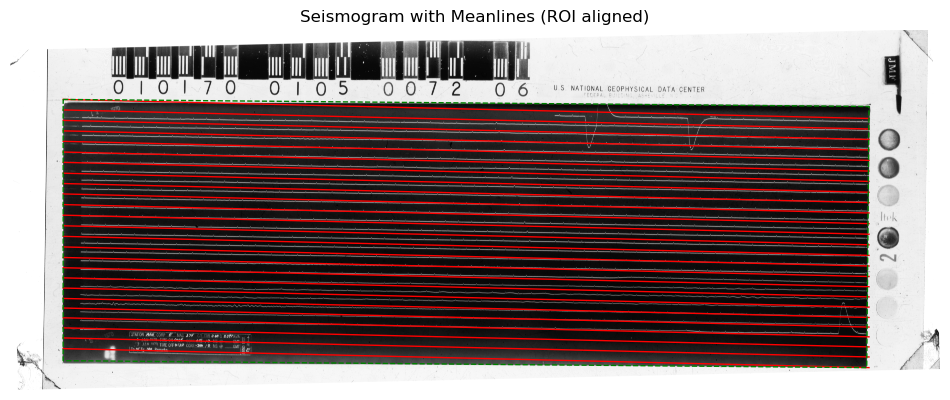

In [73]:
image_path = "../../tests/010170_0105_0072_06.png" 
meanline_path = "./010170_0105_0072_06/meanlines.json"
roi_path = "./010170_0105_0072_06/roi.json"
output_path = "./overlap/output.png"

import json
import matplotlib.pyplot as plt
from PIL import Image

img = Image.open(image_path)
img_width, img_height = img.size

# === Load JSONs ===
with open(meanline_path, 'r') as f:
    meanlines = json.load(f)
with open(roi_path, 'r') as f:
    roi_data = json.load(f)

# === Extract ROI bounds ===
roi_coords = roi_data['geometry']['coordinates'][0]
xs_roi = [pt[0] for pt in roi_coords]
ys_roi = [pt[1] for pt in roi_coords]
min_x, max_x = min(xs_roi), max(xs_roi)
min_y, max_y = min(ys_roi), max(ys_roi)

# === Print ROI info for debugging ===
print(f"ROI bounds: X: {min_x} to {max_x}, Y: {min_y} to {max_y}")
print(f"ROI width: {max_x - min_x}, height: {max_y - min_y}")
print(f"Image dimensions: {img_width} x {img_height}")

# === Plot image ===
plt.figure(figsize=(12, 6))
plt.imshow(img, cmap='gray')
ax = plt.gca()

# === Extract all meanline coordinates for debugging ===
all_meanline_xs = []
all_meanline_ys = []
for feature in meanlines['features']:
    coords = feature['geometry']['coordinates']
    xs, ys = zip(*coords)
    all_meanline_xs.extend(xs)
    all_meanline_ys.extend(ys)

min_meanline_x, max_meanline_x = min(all_meanline_xs), max(all_meanline_xs)
min_meanline_y, max_meanline_y = min(all_meanline_ys), max(all_meanline_ys)
print(f"Meanline bounds: X: {min_meanline_x} to {max_meanline_x}, Y: {min_meanline_y} to {max_meanline_y}")

# === Overlay meanlines with corrected transformation ===
for feature in meanlines['features']:
    coords = feature['geometry']['coordinates']
    xs_raw, ys_raw = zip(*coords)
    
    # Improved transformation that accounts for both ROI and meanline data
    # 1. Use meanline bounds as the normalization factor 
    # 2. Apply ROI bounds to map to the ROI region of the image
    # 3. Invert y-axis as needed for image coordinates
    
    xs = [((x - min_meanline_x) / (max_meanline_x - min_meanline_x) * (max_x - min_x)) + min_x for x in xs_raw]
    
    # Normalize y and then apply to ROI height, with y-axis inversion
    ys = [((y - min_meanline_y) / (max_meanline_y - min_meanline_y) * (max_y - min_y)) + min_y for y in ys_raw]
    
    # Now transform from ROI coordinates to image coordinates
    xs_img = [x / img_width * img_width for x in xs]  # This is actually just xs
    ys_img = [y / img_height * img_height for y in ys]  # This is actually just ys
    
    ax.plot(xs_img, ys_img, color='red', linewidth=1)

# === Draw ROI boundary for reference ===
roi_xs = [x for x in xs_roi]
roi_ys = [y for y in ys_roi]
ax.plot(roi_xs + [roi_xs[0]], roi_ys + [roi_ys[0]], 'g--', linewidth=1)

plt.axis('off')
plt.title('Seismogram with Meanlines (ROI aligned)')
plt.savefig(output_path, bbox_inches='tight', pad_inches=0)
print(f"Saved overlay to: {output_path}")
plt.show()